# <center><img src="http://millionsongdataset.com/sites/default/files/millionsong2-128.jpg" width=100> <b>A MUSIC RECOMMENDATION SYSTEM PROPOSAL</b></center>

# **1. Executive Summary**

Humans are in a constant race against time, with ever-increasing busy lives. The volume of music available to us is contantly increasing, making the task of searching for new music to listen to daunting, at the very least. 

The problem we are addressing here is using data science to build a recommendation system capable of proposing the top 10 songs to a user, based on the likelihood that said user will be listening to those songs.

Building a recommendation system based on our unique musical preferences, able to assist us in the process of finding new music to explore, will benefit us by enriching our lives. 


In order for us to build a recommendatio system, we need to answer a few key questions, listed below.
  - How do we define the musical preference of a user?

  - What factors contribute to a user's musical preference?
  
  - What data is the most useful when defining the preference of a user?
  
  - What is the musical content that a user is most likely to consume?

Depending on the data available to us, answering these question may reveal different answers. Data scientists are striving to build a reliable recommendation system, one that is accurate, fast and inexpensive.

Musical tastes are very personal, and recommending new songs to a user is not an easy task, by any measure. Ultimately, any user can benefit from having a reliable recommendation system, capable of making fast and accurate recommendations!

## **Key takeaways**

The initial analysis performed for the Milestone submission revealed important takeaways, which we aimed to address in this current submission. 

Arguably, the **most important** key takeway that needs addressing is improving the performance of the system, reflected in the performance metrics results. 

We have performed many experiments in trying to address the low performance of all the models we proposed and analyzed. In many ways, we performed a `Grid Search`, where the `hyperparameters` to by tuned are:

1. The ratio of the trainset/testset data split:
  - either a `80/20` split, 
  - a `70/30` split, or
  - a `60/40`split.
2. Dropping the imputed year values (year = 0):
  - either `True` (drop),
  - or `False` (keep).
3. Threshold parameter, in `precision@k`, and `recall@k`:
  - we experimented with these values: `1.0, 1.1, 1.2, 1.3, 1.4, 1.5`.

Ultimately, based on the extensive analysis we performed, we have concluded that the _hyperparameter_ influencing the performance metrics the most is the `threshold` parameter. The value of this parameter, in combination with any choice of the other two parameters revealed very similar results, making the `threshold` parameter the one that influences the perfomance metrics the most. The reasoning behind this comes from the data itself.

For the analysis presented in this report, the values of the parameters that we decided on are:
1. The ratio of the trainset/testset data split: `80/20`.
2. Dropping the imputed year values (year = 0): `True`.
3. Threshold parameter, in `precision@k`, and `recall@k`: `1`.

Based on our analysis, we can use any of the models presented here with these values for `hyperparameters`, the results are comparable. In fact, the simplest, most ready-to-use model can be deployed with these hyperparameters.


## **Next steps** 

There is a well-known adage in data science, `the more data, the better the model`. In recommending next steps, we are focusing on the inclusion of more data into our analysis.

When more data is available, the model is exposed to more learning opportunities, thus increasing the capability of making recommendations. 

To perform our analysis, we used a very small subset of our data, `4.86%`. We strongly believe that the reduce size of data had a tremendous influence on the performance of the models we tested. 

With respect to recommending songs based on a given title, we improved upon the `recommendations` function that generates such recommendations.
- We added an additional filter in the `recommendations` function, to make sure that we are not recommending songs with a similarity of 0.
- We have also added a verification for the existance of the title in the database. Thus, `LearnTo Fly` cannot be found in the database, and no recommendations can be made. We recommend extending the scope of this function, to capture more of such cases. There are simple NLP techniques that can be easily implemented, with very high impact.
- Due to the additional filter, there are no longer 10 songs similar to `Learn To Fly` to be recommended. The maximum number of such songs is `5`, and they are:
  1. `Everlong`.
  2. `The Pretender`.
  3. `Nothing Better (Album)`.
  4. `From Left To Right`.
  5. `Lifespan Of A Fly`.

The relatively small number of features that were used can only help in recommending songs based on the `title/release/artist` content. However, the original dataset contains a lot more valuable features, like `danceability, energy, loudness, mode, similar artists, song hotttnesss, tempo` that can be used for a content-based recommendation model. We believe that using all, or just a subset of these features will increase the value of the system, thus generating more revenue. 

Although the data that we have used is not `Spotify`-per se, we can consider including `Spotify`-related data. There are vast data sets pertaining to `Spotify`, and their inclusion would have the potential of making a content-based system more robust. 

For example, there is a Spotify-specific dataset containing `genre`-related data. Our original dataset has no `genre` information. We would argue that incorporating this additional data to our dataset will increase the accuracy of the recommendations.

We have also recently learned about the existence of `Spotipy`, a lightweight Python library for the `Spotify Web API`. Using `Spotipy`, one can get full access to all of the music data provided by the `Spotify` platform.

One may discover new songs to listen to while listening on the Radio. The Radio stations tend to play new songs, providing exposure. At the same time, they play `Oldies but goldies songs`, songs based on various decades, catered to various age-categories of listeners.

Many users listen to a limited number of genres of music. A cluster-based recommendation system based on genre information would make most sense when addressing this category of users.

On the other hand, users with eclectic taste that spans across many various genres will benefit only to some extent from a genre-cluster based system. A more elaborate recommendation system would use sentiment analysis data, and make more accurate prediction in this way.

For any user, instead of focusing on recommending a particular song, we may focus our recommendation on a particular playlist. For instance, if we are to incorporate data from an `IoT` wearable device, capable of measuring the `B`eats-`P`er-`M`inute, we can recommend song from a playlist accordingly.
  - `Low BPM`: recommend songs from a `Relaxing/Meditative` playlist;
  - `High BPM`: recommend songs from a `High Energy/Dancing` playlist.

Music is present not only as stand-alone songs, but also as background audio, accompanying video. An app like `Shazam` gives an user the possibility of discovering new music/songs. Using data from Shazam alongside data already available, one can improve on a recommendation system, by making use of the data preferences of a user.

# **2. Problem and solution summary**

## **Summary of the problem**

The problem we are addressing here is using data science to build a recommendation system capable of proposing the top 10 songs to a user, based on the likelihood that said user will be listening to those songs.

## **Final proposed solution design**


### **Data Preprocessing**

The **data preprocessing steps** we performed are listed below:

1. **Merge `count_df` and `song_df`**, the two dataframes with original data, and **drop** the `Unnamed: 0` column.
  - Duplicated records in the `song_df` dataframe were discarded during the merge.
  - The type of the merge is `left`-merge, as we need to include `all` the records in the `count_df`.
  - The `merge`-ing column is `song_id`.
2. **Encode the `user_id` and `song_id` attributes**, using a label encoder. This step is needed, as the original IDs are strings, and not numeric values.
3. **Filter the dataset**, by removing, in this order:
  
  a. users who have listened to less than 90 songs, and 
  
  b. songs that have been listened to by less than 120 users.
4. **Generate a rating scale**. In order to create a semblance of a rating system, we have restricted our data to users that have listened to a song at most 5 times. In this way, `play_count` can be used as a rating system, with values between `1` and `5`.  
5. **Drop the entries that have `year == 0`**

After merging the two datasets, `count_df` and `song_df`, the resulting dataset contains `2,000,000` rows, and `7` columns. From a computing-resources standpoint, this volume of data can be computationally intensive, and, consequently, a long processing time. This, in turn, can impede on the efficiency of the training and evaluation of our models. To address this performance issue, we filtered our data, and reduced its size to `4.86%` of the original size. The final dataset we will be used for modeling contains `97,227` rows, and `7` columns.


The following table summarizes the data size reduction obtained in steps 3-5


|Step|Shape before step|Shape after step|
|-:--|-----------------|----------------|
| 3a | (2000000, 7) |  (438390, 7) |
| 3b | (438390, 7) |  (130398, 7) |
| 4 | (130398, 7) | (117876, 7) |
| 5 | (117876, 7) | (97227, 7) |


### **Recommendation system workflow**

A training set is fed to a recommendation algorithm, which produces a recommendation model that can be used to generate new predictions. 

To evaluate the model, a held-out testset is fed to the learned model, where predictions are generated for each user-item pair. 

Predictions with known labels (true value) are then used as an input to the evaluation algorithm to produce evaluation results.

### **Algorithms and Models analysis**

In this case study, we built recommendation systems using four different category of algorithms, as described below.

1. `Rank-based` algorithm, using averages of `play_count`s for ranking.

2.  `Collaborative-filtering` algorithms:
    
    a. `Similarity/Neighborhood-based`:
      - `User-user` similarity, and its improved version;
      - `Item-item` similarity, and its improved version.
    
    b. `Model-based`:
      - `Matrix-factorization`: `Singular Value Decomposition` and its improved version.

3. `Cluster-based` algorithm, and its improved version.
    
4. `Content-based` recommendation system.  

The `surprise` library was used to demonstrate all of the `Collaborative-filtering`-based algorithms. For all of these algorithms, `Grid Search Cross-Validation` was used to find the optimal hyperparameters for the data, and to improve upon the baseline algorithms. In addition, the optimal hyperparameters were used to generate related predictions.

### **Evaluation metrics**

Many evaluation metrics are available for recommendation systems, and each one of them has its own pros and cons. 

In the context of recommendation systems, we are most likely interested in recommending top-N items to the user. In this sense, it makes the most sense to compute precision and recall metrics in the first N items, instead of all of the items. Thus, we are using the notion of precision and recall at k, where k is a user-definable integer to match the top-N recommendations objective.

To `evaluate the performance` of these models, we used `precision@k` and `recall@k` metrics. Since both of these metrics are indicative of a model's performance, the harmonic mean of these two metrics, `F_1 score` has been calculated for each of the models we highlighted. 

The `Precision@k`, `Recall@k` and `F1_score@k` are defined below:

  - $\text{Precision@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Recommended items} \} | }$

  - $\text{Recall@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Relevant items} \} | }$

  - $\text{F1_score@k} = \frac{2}{{\frac{1}{\text{Precision@k}} + {\frac{1}{\text{Recall@k}}}}}$

An item is considered `relevant` if its true rating $r_{ui}$ is greater than a given `threshold`. 

An item is considered `recommended` if its estimated rating
$\hat{r}_{ui}$ is greater than the threshold, and if it is among the k highest estimated ratings.

Note that in the edge cases where division by zero occurs, `Precision@k` and `Recall@k` values are undefined. As a convention, we set their values to 0 in such cases.

`Recall`: the fraction of relevant songs that are recommended to a user.

`Precision`: the fraction of the recommended songs that are relevant to the user.

`Precision@k` is the proportion of recommended items in the top-k set that are relevant.

`Recall@k` is the proportion of relevant items found in the top-k recommendations.

One takeaway worth mentioning is that we have performed an in-depth analysis of the `Precision@k` and `Recall@k`, varying the values of the `k` parameter, from `10` to `40`, in increments of 10. 

When `k = 40`, all the models we tested satisfy `Precision@40 = Recall@40 = 1`. That is, for `k = 40`, we reach `100% accuracy` of our models.

Another takeaway worth mentioning is that for a `60/40` data split, the models reach `100% accuracy` when `k = 60`.

The following table **summarizes the metric results** used to evaluate the models we build for our analysis. More on this analysis is presented later in the report.

|metric|user-user|user-user-optimized|item-item|item-item-optimized|SVD|SVD-optimized|coCluster|coCluster-optimized
|--:---|---------|-------------------|---------|-------------------|---|-------------|---------|-------------------|
|RMSE  |1.088  |1.041             |  1.024  |1.02 |**1.009**|**1.009**|1.033|1.04
|Precision@10|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|
|Recall@10|0.948|0.948|0.948|0.948|0.948|0.948|0.948|0.948|
|Recall@20|0.994|0.994|0.994|0.994|0.994|0.994|0.994|0.994|
|Recall@30|0.999|0.999|0.999|0.999|0.999|0.999|0.999|0.999|
|Recall@40|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|
|$F_1$ score@10|0.973|0.973|0.973|0.973|0.973|0.973|0.973|0.973|
|$F_1$ score@20|0.997|0.997|0.997|0.997|0.997|0.997|0.997|0.997|
|$F_1$ score@30|0.999|0.999|0.999|0.999|0.999|0.999|0.999|0.999|
|$F_1$ score@40|1.0|1.0|1.0|1.0|1.0|1.0|1.0|1.0|

As illustrated in the table above, all the models we tested perform really well. 

The following table **summarizes the predictions** for user `6958`, and the 2 songs, 
- `1671` (`r_ui = 2`), that the user listened to, and
- `3232`, (`r_ui = None`) that the user did not listened to.

|Algorithm|min_predicted_play_count|max_predicted_play_count|(6958, 1671, 2)|(6958, 3232, None)|
|--:------|------------------------|------------------------|---------------|------------------|
|user-user|||1.67|1.67|
|user-user-optimized|2.69|3.05|**1.91**|1.29|
|item-item|||1.31|1.3|
|item-item-optimized|2.04|2.72|**1.91**|1.29|
|SVD|||1.31|1.23|
|SVD-optimized|2.04|2.72|1.36|1.44|
|coCluster|||1.2|1.02|
|coCluster-optimized|1.98|3.14|1.0|1.0|

Looking at the accuracy of the models we tested, we can conclude that the `user-user-optimized` model is performing the best predictions for the songs that have an actual rating (the `1.91` predicted value is the closest to the `2` actual value).

To propose a final model, we can easily pick any one of the analyzed models. However, we propose the `S`ingular `V`alue `D`ecomposition (SVD) model, which is a ready-to-use, model-based collaborative filtering model, very robust. It is a personalized recommendation system, in which the recommendations are based on the past behavior of the user, and are not dependent on any additional information. The aim of this model is to use the latent features to find recommendations for each user.

# **3. Recommendations for implementation**

## **Implementation strategy**

Below we present an example of an implementation strategy:

1. **Establish a goal**: for example, implementing the data science model to recommend songs when `genre` feature is added to the data. 
2. **Schedule milestones**: for example, adding a new feature and testing its usefullness every month.
3. **Define success**: for example, successful implementation and training in 4 weeks or less; model still in use 3 months or more after implementation.
4. **Re-asses implementation metrics**: time and money necessary for implementation, availability of human resources, etc.

## **Cost analysis**

We run the complete analysis of all the models presented on Google Colab. While benefiting of the free-cost of using this system, we are cognizant of the fact that using a recommendation system at scale comes at a cost.

Given the nature of the data used in the recommended solution, a cloud solution is recommended to be implemented, rather than one on-premise. A cloud-service model, ready-to-use has a lot of benefits.

Moreover, considering that the data is constantly evolving, using a cloud solution will contribute to the efficiency of the system. While it is true that using a cloud provider comes at a cost, it is also true that it will offset the costs of having an on-premise solution build from ground-up, with all the additional costs of maintaining it.

The next decision to be made is with respect to the type of cloud-service model that we wish to use: 
- `IaaS` - Infrastructure as a Service,
- `PaaS` - Platform as a Service, or
- `SaaS` - Software as a Service.

Please note that a real cost analysis at large scale needs the help of an
economist or business analyst. There are more factors involved when performing such analysis, than the scope of our analysis allowed for.

## **Risks and challenges**

Due to the nature of the data we used in our analysis, we concluded that the `threshold = 1` is the most indicative of the data, and it should be used as such.

However, when more data is added to the system, the distribution of the ratings will change, and consequently, we will need to change the value of the parameter. A key indication of how to chose the value for the threshold comes from the statistical analysis of the ratings in the dataset. 

When the threshold parameter is changed, a complete performance analysis of the system is needed, and all the models discussed here need to be evaluated. 

One dillema we faced when building the content-based model was related to the accuracy of the recommendations. Our model is trained to recommend the top 10 songs. However, when further analysing the recommendations, we noticed that only half of the songs recommended were actually similar to the title we were recommending for. Thus, an ethical dillema was formed, `To recommend, or to not recommend, this is the question`. As a potential solution to this dilemma, we propose to introduce the notion of `suggestion`. 

## **Further analysis**

We strongly believe that incorporating a larger `N`atural `L`anguage `P`rocessing(NLP) component would bring large benefits to the system. There are ready-to-use NLP models, that can be trained and tested on our data.

If cost is not an issue, maybe it is worth investigating using Neural Networks to improve the recommendations. However, these models are known to be computationally expensive, so maybe the costs associated with using them far outweight the benefits.

#### **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

### song_data

**song_id** - A unique id given to every song

**title** - Title of the song

**Release** - Name of the released album

**Artist_name** - Name of the artist 

**year** - Year of release

### count_data

**user_id** - A unique id given to the user

**song_id** - A unique id given to the song

**play_count** - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

#### Appendix: Acknowledgements:

$\text{Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. The Million Song Dataset. In Proceedings of the 12th International Society for Music Information Retrieval Conference (ISMIR 2011), 2011.}$



## **Importing the Necessary Libraries, and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Notebook Color Scheme:



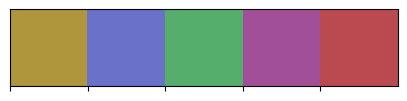

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity
# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

from collections import defaultdict

# Custom colors
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'

# The custom colors chosen here were generated by 'I want hue' app. 
# The were chosen for color-blindness.
my_colors = ["#af953c", "#6971c9", "#56ae6c",
             "#a24f99", "#ba4a4f"]

# Optionally, create a color map, particularly for future use.
CMAP1 = ListedColormap(my_colors)

# Display my own color scheme, as a reference.
print(clr.S+'Notebook Color Scheme:\n'+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

### **Loading the data**

In [ ]:
# Importing the datasets
song_df = pd.read_csv('/content/drive/MyDrive/CapstoneProject/song_data.csv') 

count_df = pd.read_csv('/content/drive/MyDrive/CapstoneProject/count_data.csv') 



### **A first look at the data**

In [ ]:
# Display the first 10 records in count_df
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display the last 10 records in song_df
song_df.tail(10)

,song_id,title,release,artist_name,year
999990,SOFAXZU12AB01881C4,Way Down,Way Down,Taylor Hawkins & The Coattail Riders,2010
999991,SOYFFWW12A6701C135,So Many People,Four,Bah Samba,2002
999992,SOBODSE12A8C13EBD6,Inequality Street,No Daylights_ Nor Heeltaps,SKYCLAD,1996
999993,SOWCNSN12AB018070F,Taurus (Keenhouse Remix),Taurus,Loose Shus,0
999994,SOVRJOO12A8C143C7A,Down Fo' The Kick Doe,Messy Marv Presents: Draped Up and Chipped Out...,Killer Mike feat. Gangsta Pill and Nario of Gr...,0
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0
999999,SOWXJXQ12AB0189F43,Fernweh feat. Sektion Kuchikäschtli,So Oder So,Texta,2004


### **Initial Data Exploratory Analysis**

In [ ]:
# Display the count_df info
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Display the shape of count_df
count_df.shape

(2000000, 4)

In [ ]:
# Check for missing values in count_df
count_df.isna().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
# Number of unique song IDs in count_df
count_df['song_id'].nunique()

10000

In [ ]:
# General statistics on count_df
count_df.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [ ]:
# Display the song_df info
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Display the shape of song_df
song_df.shape

(1000000, 5)

In [ ]:
# Check for missing values in song_df
song_df.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [ ]:
# Number of unique song IDs in song_df
song_df['song_id'].nunique()

999056

In [ ]:
# Number of unique title in song_df
song_df['title'].nunique()

702428

#### **Observations and Insights:**

1. Observations about `count_df`:
- - There are `2,000,000` entries.
- `10,000` unique song IDs in `count_df`, which means that, on average, there are aproximately `200` entries for each song, i.e., 200 different users listened to one particular song. This is a gross estimation, of course!
- `Unnamed: 0` and `play_count` have integer values, while `user_id` and `song_id` are strings.
- There are no missing values.
- The average number of times a song was played is 3.
- The minimum number of times a song was played is 1.
- The maximum number of times a song was played is 2213. This value seems like a clear outlier, or maybe someone just loves a song that much!

2. Observations about `song_df`:
- There are `1,000,000` entries.
- There are `999,056` unique song IDs, which means that there are very few rows sharing the same song ID.
- There are `702,428` unique song titles, which means that there are a lot of different songs with the same title.
- All the attributes are strings, with the exception of `year`, which is an integer number. 
- There are very few missing values:
  - `15` missing values for `title`, and
  - `5` missing values for `release`. 



### **Data Preprocessing**

The **data preprocessing steps** we performed are listed below:

1. **Merge `count_df` and `song_df`**, the two dataframes with original data, and **drop** the `Unnamed: 0` column.
  - Duplicated records in the `song_df` dataframe were discarded during the merge.
  - The type of the merge is `left`-merge, as we need to include `all` the records in the `count_df`.
  - The `merge`-ing column is `song_id`.
2. **Encode the `user_id` and `song_id` attributes**, using a label encoder. This step is needed, as the original IDs are strings, and not numeric values.
3. **Filter the dataset**, by removing, in this order:
  
  a. users who have listened to less than 90 songs, and 
  
  b. songs that have been listened to by less than 120 users.
4. **Generate a rating scale**. In order to create a semblance of a rating system, we have restricted our data to users that have listened to a song at most 5 times. In this way, `play_count` can be used as a rating system, with values between `1` and `5`.  
5. **Drop the entries that have `year == 0`**

After merging the two datasets, `count_df` and `song_df`, the resulting dataset contains `2,000,000` rows, and `7` columns. From a computing-resources standpoint, this volume of data can be computationally intensive, and, consequently, a long processing time. This, in turn, can impede on the efficiency of the training and evaluation of our models. To address this performance issue, we filtered our data, and reduced its size to `4.86%` of the original size. The final dataset we will be used for modeling contains `97,227` rows, and `7` columns.


The following table summarizes the data size reduction obtained in steps 3-5


|Step|Shape before step|Shape after step|
|-:--|-----------------|----------------|
| 3a | (2000000, 7) |  (438390, 7) |
| 3b | (438390, 7) |  (130398, 7) |
| 4 | (130398, 7) | (117876, 7) |
| 5 | (117876, 7) | (97227, 7) |


#### 1. **Merge `count_df` and `song_df`**, the two dataframes with original data.

In [ ]:
# Merge the count_df and song_df data on song_id. 
df = count_df.merge(song_df.drop_duplicates('song_id'), how='left', on='song_id').drop_duplicates()
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


#### 2. **Encode the `user_id` and `song_id` attributes**

In [ ]:
# Apply a label-encoding for user_id and song_id attributes.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['user_id'] = label_encoder.fit_transform(df['user_id']) 
df['song_id'] = label_encoder.fit_transform(df['song_id'])


#### 3. **Filter the dataset**


In [ ]:
print(clr.S+'Original shape of df: {}'.format(df.shape)+clr.E)

Original shape of df: (2000000, 7)


#### **3a. Remove the users who have listened to less than 90 songs**

In [ ]:
# Group data on user_id, and count how many different songs each user has listened to.
group_users = df.groupby('user_id').count().reset_index(names=['user_id'])
# Drop the users that have listened to less than 90 songs.
df = df.loc[~df['user_id'].isin(group_users[group_users['play_count'] < 90]['user_id'])]

In [ ]:
print(clr.S+'Shape of df after removing the users that have listened to less than 90 songs: {}'.format(df.shape)+clr.E)

Shape of df after removing the users that have listened to less than 90 songs: (438390, 7)


#### **3b. Remove the songs that have been listened to by less than 120 users**

In [ ]:
# Group data on song_id, and count how many different users listened to each song.
group_songs = df.groupby('song_id').count().reset_index(names=['song_id'])
# Drop the songs that have been listened to by less than 120 users.
df = df.loc[~df['song_id'].isin(group_songs[group_songs['play_count'] < 120]['song_id'])]

In [ ]:
print(clr.S+'Shape of df after removing the songs that have been listened to by less than 120 users: {}'.format(df.shape)+clr.E)

Shape of df after removing the songs that have been listened to by less than 120 users: (130398, 7)


#### 4. **Generate a rating scale**

In [ ]:
# Drop records with play_count more than(>) 5
df = df[df.play_count <= 5]

In [ ]:
print(clr.S+'Shape of df after removing the records with a play count greater than 5: {}'.format(df.shape)+clr.E)

Shape of df after removing the records with a play count greater than 5: (117876, 7)


#### 5. **Drop the entries that have `year = 0`**

In [ ]:
# Dropping all the records that have the `year = 0`.
df_final = df[df['year'] > 0]


In [ ]:
# The shape of the preprocessed data
print(clr.S+'The final shape of the df: {}'.format(df_final.shape)+clr.E)

The final shape of the df: (97227, 7)


# 4. Helper Functions



In [ ]:
# ========== General Functions ==========

# ========== Function show_values_on_bars ==========
def show_values_on_bars(axs, h_v='v', space=0.4, int_display=True):
    """
    Plots the value at the end of the a seaborn barplot.
    Params:
      axs: the ax of the plot
      h_v: weather or not the barplot is vertical/ horizontal
      int_display: boolean indicating if we want the displayed numbers to be converted or not to int.
    """
    
    def _show_on_single_plot(ax):
        if h_v == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                # if int_display, convert the number into int.
                if int_display:
                    value = int(p.get_height())
                # otherwise, display the real number rounded to 2 decimals.
                else:
                    value = round(p.get_height(),2)
                ax.text(_x, _y, format(value, ','), ha='center', weight='bold') 
        elif h_v == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                if int_display:
                    value = int(p.get_height())
                else:
                    value = round(p.get_height(),2)
                ax.text(_x, _y, format(value, ','), ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# ========== Function get_describe ==========        
def get_describe(x):
    """
    Get .describe() info.
    """
    return {"mean": x.mean(),
            "min": x.min(),
            "max": x.max(),
            "count": len(x)}
 
# ========== Function barplot_display ==========
def barplot_display(df, x_col, y_col, title, xlabel, ylabel, figsize=(12,6), fontsize=12, int_display=True):
    """
    A personalized display of a barplot.
    Params:
        df: the DataFrame with data to be displayed
        x_col: the x column of the plot
        y_col: the y column of the plot
        title: the title of the plot
        xlabel: the xlabel of the plot
        ylabel: the ylabel of the plot
        int_display: boolean indicating whether the displayed numbers to be converted or not to int.
    """
    plt.figure(figsize=figsize)
    figure = sns.barplot(data=df, x=x_col, y=y_col, palette=my_colors)
    plt.xlabel(xlabel, weight='bold', size=fontsize)
    plt.ylabel(ylabel, weight='bold', size=fontsize)
    plt.xticks(weight='bold')
    show_values_on_bars(figure, h_v="v", space=0.4, int_display=int_display)
    plt.title(title, weight="bold", size=fontsize+4)
    plt.yticks([])
    sns.despine(top=True, bottom=True, left=True)
    plt.savefig('fig.png')
    plt.show()

# ========== Function precision_recall_at_k ==========
def precision_recall_at_k(model, k=10, threshold=1, verbose=True):
    """
    A function to calculate rmse, precision, recall, and F1_score, at k.
    This function is adapted from the one in the Surprise library.
    Params:
      model: the model to be used for predictions
      k: the number of relevant items to be considered (top k)
      threshold: the minimum value that a rating should satisfy to be relevant
      verbose: Bool, determines the way to display the results
    Returns:
      [rmse, recall, precision, f1_score]
        verbose=True: displays the list containing the 4 metrics     
        verbose=False: returns a list with the 4 metrics. 
          This is useful when experimenting with various values for (k, threshold).

    """

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data.
    predictions = model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user play counts by estimated value.
        user_ratings.sort(key=lambda x : x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Here, we set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Here, we set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    rmse = round(accuracy.rmse(predictions, verbose=False), 3)

    f1_score = round((2 * precision * recall) / (precision + recall), 3)

    if verbose:
        return print(clr.S+'rmse: {}, recall: {}, precision: {}, f1_score: {}'.format(rmse, recall, precision, f1_score)+clr.E)
    else:  
        return [rmse, recall, precision, f1_score]  

# ========== Function get_songs_played_by_user ==========       
def get_songs_played_by_user(user, data):
    """
    Returns all the songs played by a user.
    Params:
        user: user_id
        data: the dataframe with the data
    Returns:
        An array with all the song_ids of the songs user_id listened to.    
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='song_id', and change the return condition.
    """
    return data[data['user_id'] == user]['song_id'].unique()

# ========== Function get_songs_not_played_by_user ==========       
def get_songs_not_played_by_user(user, data):
    """
    Returns all the songs not played by a user.
    Params:
        user: user_id
        data: the dataframe with the data
    Returns:
        An array with all the song_ids of the songs user_id had not listened to.    
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='song_id', and change the return condition.
    """
    return data[~data['song_id'].isin(get_songs_played_by_user(user))]['song_id'].unique()

# ========== Function played_count_predict ==========       
def play_count_predict(algo, user, song, r_ui=None):
    """
    A function that uses algo, to predict the rating for a song, by user.
    Args:
        algo: the algorithm used for prediction
        user: the user_id
        song: the song_id 
        r_ui: play_count, if it exists 
    Returns:
        A formatted display of the results of the prediction method.
    """
  
    r_ui = algo.predict(user, song, r_ui=r_ui).r_ui
    est = round(algo.predict(user, song).est, 2)
    return print(clr.S+'Displaying the predictions for user {} and song {}.\n\n- Real prediction: {},\n- Estimated prediction: {}.'
                 .format(user, song, r_ui, est)+clr.E)
    
# ========== Function display_best_params ==========       
def display_best_params(model):
    """
    Function to display the best RMSE and values of the hyper-parameters, following a Grid/Randomized search.
    Args:
        model: the model used
    Returns:    
    """
    print(clr.S+'RMSE of the best option: {}'.format(round(model.best_score['rmse'], 3))+clr.E)
    print(clr.S+'The hyperparameters of the best option: {}'.format(model.best_params['rmse'])+clr.E)
    
# ========== Function get_recommendations ==========       
def get_recommendations(data, user, n, algo):
    """
    Function to get the top_n recommendations for a user.
    Params:
        data: the DataFrame with user-item information
        user: the ID of the user for which we generate recommendations
        n: the upper limit of the recommendations we are making
        algo: the algorithm used for recommendations
    Returns:
        A list of the top_n items recommended to the user.
    """    
    # Creating an empty list to store the recommended song IDs.
    recommendations = []
    
    # Creating an user-item interactions matrix. 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
   
    # Extracting those song IDs that the user_id has not listened to yet.
    non_listened_songs = user_item_interactions_matrix.loc[user][user_item_interactions_matrix.loc[user].isnull()].index.tolist()
    
    # Looping through each of the song IDs that user_id has not listened to yet.
    for item_id in non_listened_songs:
    
        # Predicting the play_count for those songs not listened to by this user.
        est = round(algo.predict(user, item_id).est, 2)
       
        # Appending the predicted play_counts.
        recommendations.append((item_id, est))
        
    # Sorting the predicted play_counts in descending order.
    recommendations.sort(key = lambda x: x[1], reverse=True)
    
    # Returing top n highest predicted play_counts for this user.
    return recommendations[:n]

# ========== Function get_users_who_played_song ==========       
def get_users_who_played_song(song, data):
    """
    data=df_final
    Returns all the users who listened to the song.
    Params:
        song: song_id
        data: the dataframe with the data
    Returns:
        An array with all the user_ids of the users who listened to the song.    
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='user_id', and change the return condition.
    """
    return data[data['song_id'] == song]['user_id'].unique()

# ========== Function get_users_who_did_not_played_song ==========    
def get_users_who_did_not_played_song(song, data):
    """
    Returns all the users who did not listened to the song. 
    Params:
        song: song_id
        data: the dataframe with the data
    Returns:
        An array with all the user_ids of the users who had not listened to the song.    
    TODO: it can be easily updated to generalize the interaction between a user and items.
    Add an additional param item='user_id', and change the return condition.
    """
    return data[~data['user_id'].isin(get_users_who_played_song(song, data=data))]['user_id'].unique()

# ========== Function ==========       


# 5. Exploratory Data Analysis

In [ ]:
df_final['year'].value_counts().reset_index().head()

,index,year
0,2009,16351
1,2008,14031
2,2007,13750
3,2003,7928
4,2006,7592


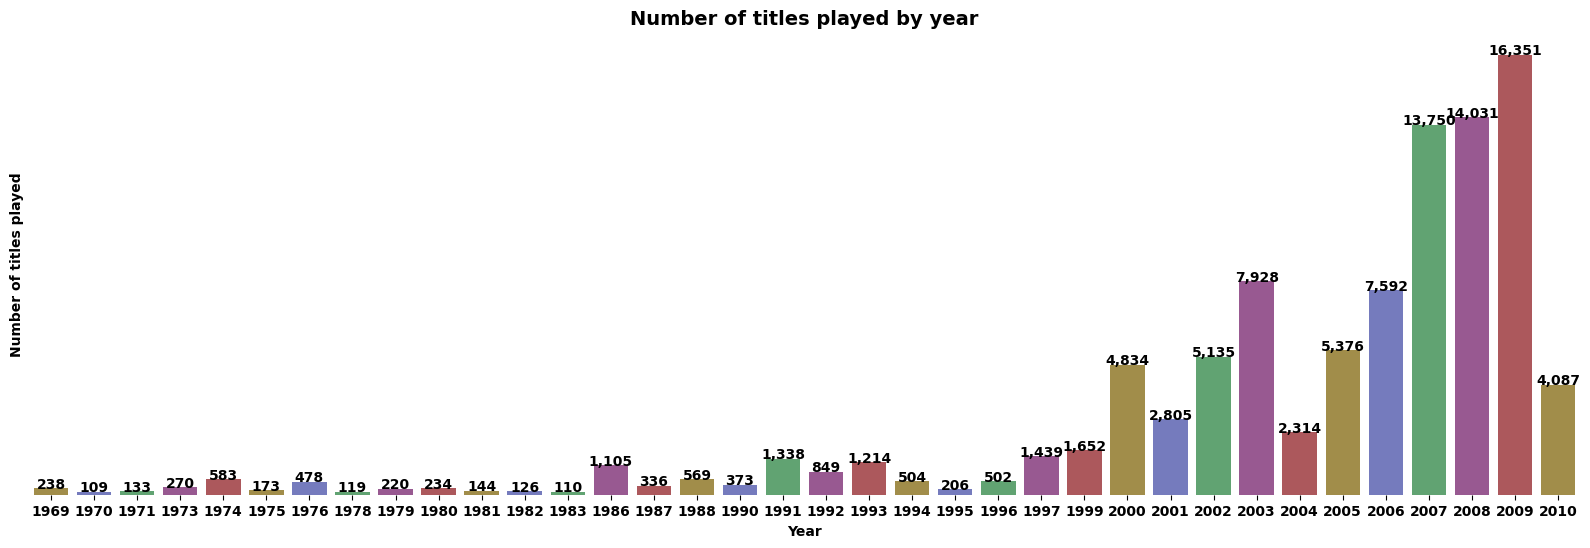

In [ ]:
barplot_display(df_final['year'].value_counts().reset_index(), \
                'index', 'year', \
                'Number of titles played by year', \
                'Year', 'Number of titles played', \
                (20,6), 10)

#### **Final dataset** general observations.

  - `3154` unique users,
  - `478` unique songs IDs,
  - `476` unique song titles, and 
  - `185` unique artists.
  - There are `no missing values` in our final data set.
  - **_Note_**: the fact that there are more unique song IDs than titles indicates that there are songs with the same title, so title cannot be used as a unique key in further investigations.


In [ ]:
df_final.describe()

,user_id,song_id,play_count,year
count,97227.000000,97227.000000,97227.000000,97227.000000
mean,37950.844405,4947.627511,1.676880,2003.844333
std,22015.563201,2889.550528,1.071061,7.065753
min,11.000000,21.000000,1.000000,1969.000000
25%,19406.000000,2389.000000,1.000000,2002.000000
50%,37043.000000,5138.000000,1.000000,2006.000000
75%,57039.000000,7509.000000,2.000000,2008.000000
max,76347.000000,9989.000000,5.000000,2010.000000


In [ ]:
df_final['play_count'].median()

1.0

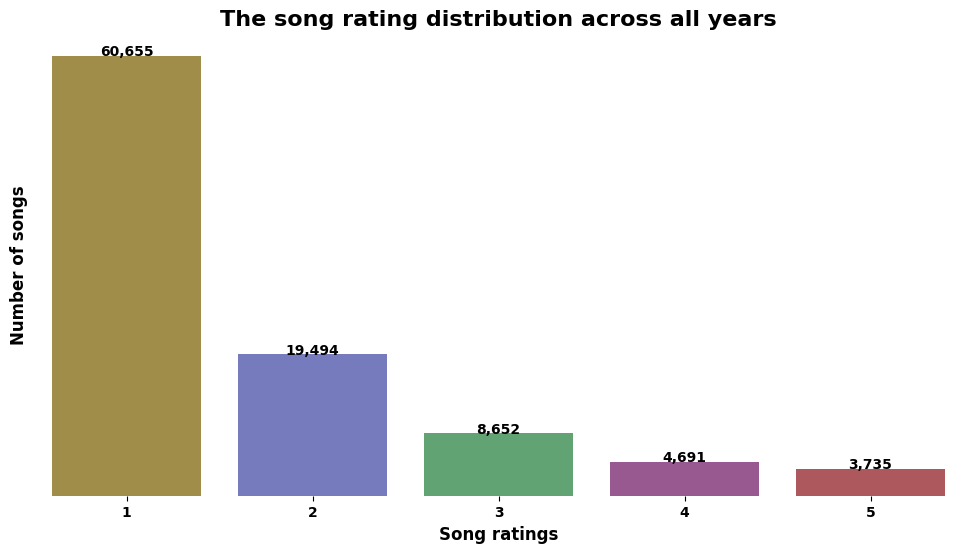

In [ ]:
barplot_display(df_final['play_count'].value_counts().reset_index(), \
                'index', 'play_count', \
                'The song rating distribution across all years', \
                'Song ratings', 'Number of songs')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- Total number of `unique user_id`s

In [ ]:
# Display the total number of unique user_id
df_final['user_id'].nunique()

3154

- Total number of `unique song_id`s

In [ ]:
# Display the total number of unique song_id
df_final['song_id'].nunique()

478

- Total number of `unique title`s

In [ ]:
# Display the total number of unique titles
df_final['title'].nunique()

476

In [ ]:
# Display the total number of unique artists
df_final['artist_name'].nunique()

185

In [ ]:
# Checking for missing values
df_final.isna().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

### **Finding the most popular songs, and the most active users**

We are interested in finding:

- `The most popular songs`, defined the songs that have been listened to by the largest number of unique users.
- `The most active users`, defined as the users who have listened to the largest number of unique songs.


#### **The most popular songs**

In [ ]:
#most_popular_songs = df_final.groupby('song_id').count().reset_index().sort_values(by='user_id', ascending = False)[:10]
most_popular_songs = df_final.groupby('song_id').size().sort_values(ascending=False)[:10]
most_popular_songs

song_id
8582    751
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
703     567
8092    550
9931    544
dtype: int64

#### **Most active users**

In [ ]:
most_active_users = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_active_users

user_id
61472    207
15733    183
37049    174
9570     150
10763    150
9097     148
43041    148
75144    146
23337    142
26616    142
dtype: int64

#### **Observations and Insights:**

- The most interacted song is `8582`, and it has been listened by `751` different users.
- The user `61472` had the highest number of interactions with songs, `207`. That is, this user listened to `207` different songs, which is the highest number of different songs a user listened to.

### **Songs played in a year**

Our analysis indicates that there are 
- 478 unique song IDs, and 
- 476 unique titles. 

This means that there are a few titles that are used for different songs.
Consequently, to compute the number of songs played in a year, we will use
the `song_id` attribute, rather than the `title` attribute.

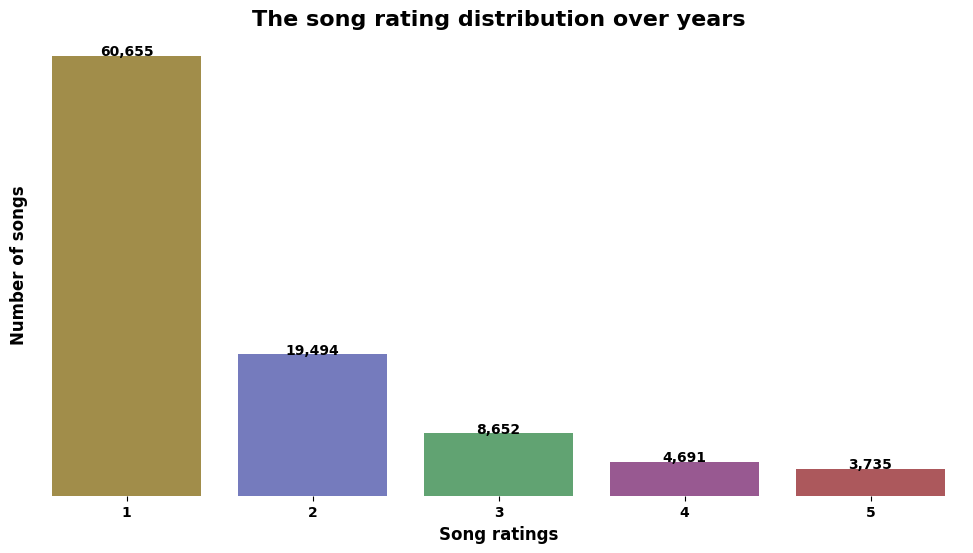

In [ ]:
barplot_display(df_final['play_count'].value_counts().reset_index(), \
                'index', 'play_count', \
                'The song rating distribution over years', \
                'Song ratings', 'Number of songs')


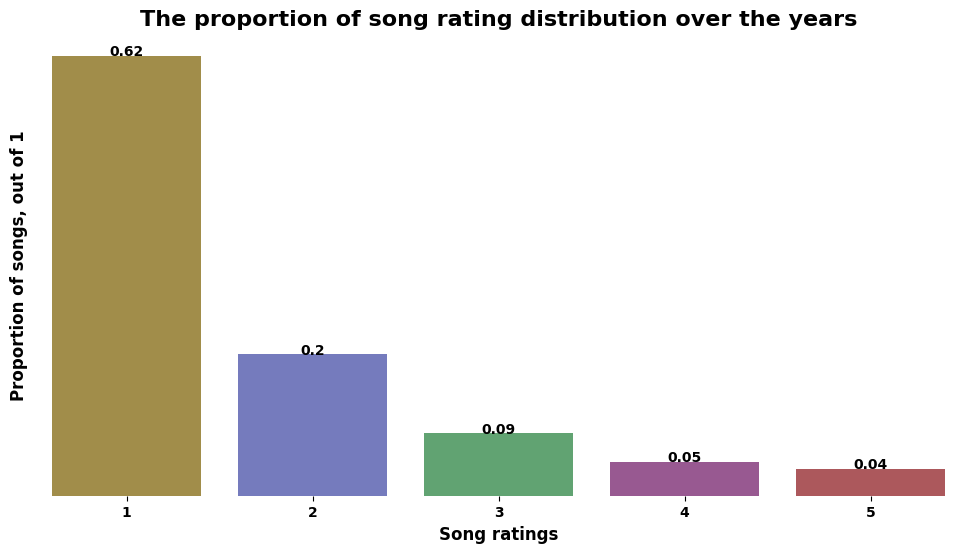

In [ ]:

barplot_display(df_final['play_count'].value_counts(normalize=True).reset_index(), \
                'index', 'play_count', \
                'The proportion of song rating distribution over the years', \
                'Song ratings', 'Proportion of songs, out of 1', \
                int_display=False)


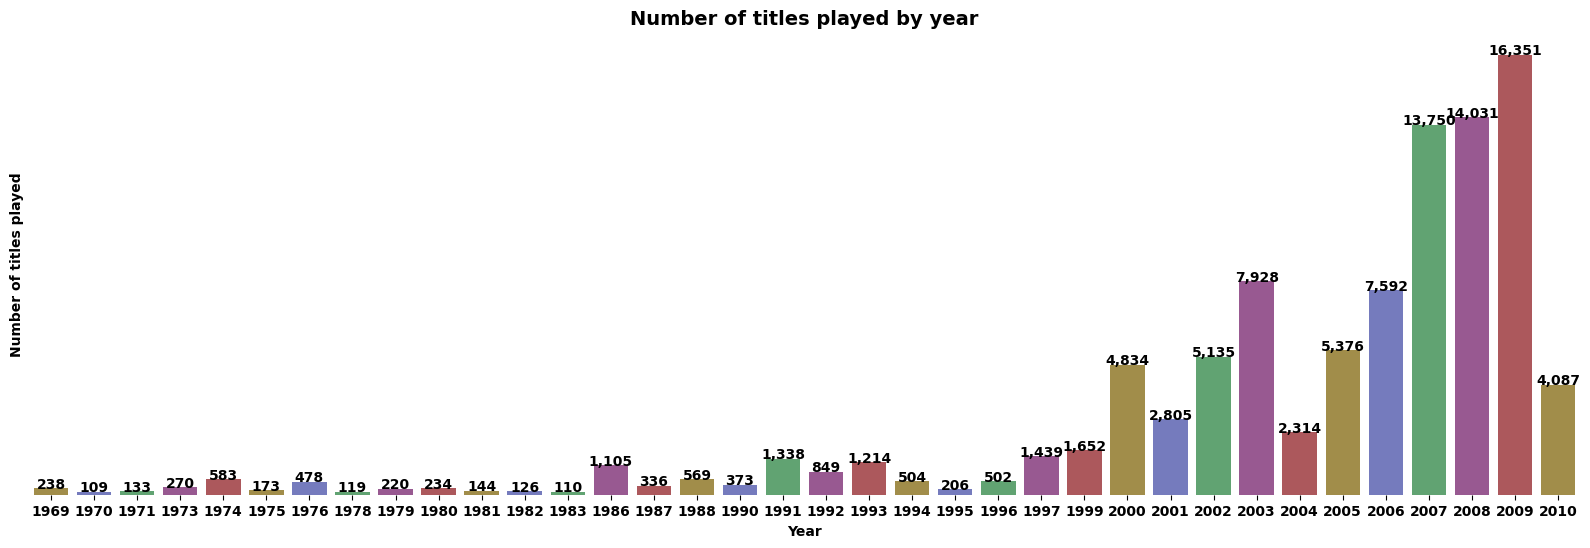

In [ ]:
barplot_display(df_final['year'].value_counts().reset_index(), \
                'index', 'year', \
                'Number of titles played by year', \
                'Year', 'Number of titles played', \
                (20,6), 10)

#### **Observations and Insights:** # 

We notice that:

- During the period `1969 - 1986`, the number of songs is extremely low. One possible explanation is that the songs with `year = 0` should have the value for the `year` from this range.
- There are several years missing from this period. We may try imputing values for those missing years, as it's not feasible that there were no songs produced in those years.


# 6. Building various models

## **6.1 Ranked-Based Recommendation Systems**

The `first model` we are building is based on the `popularity` of a song. We define the popularity measure of a song based on the frequency the song is played.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()
# Calculating the frequency a song is played
play_frequency = df_final.groupby('song_id')['play_count'].sum()  

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_frequency})
# Sort the dataframe in descending order, by the average number of counts a song was played.
# Reset the index, so song_id becomes the index.
final_play = final_play.sort_values(by='avg_count', ascending=False)
# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
7224,3.373832,361
8324,2.625000,252
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248


In [ ]:
final_play.describe(include='all')

,avg_count,play_freq
count,478.000000,478.000000
mean,1.638275,341.083682
std,0.210920,218.353466
min,1.238710,155.000000
25%,1.486484,205.250000
50%,1.613600,248.500000
75%,1.744960,389.750000
max,3.373832,1463.000000


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

# Defining a function to get the top n songs, based on the highest average play_count of a song and minimum interactions with it.
# Find the top *n* songs that have _at least_ *min_interaction*s (>= min_interaction). 
# We choose the default value for min_interaction to be 200, which is > min(play_freq).
# The songs are ranked based on their average play_count.

def top_n_songs(final_play, n, min_interaction=200):
    
    # Finding songs with minimum number of interactions.
    recommendations = final_play[final_play['play_freq'] >= min_interaction]
    
    # Sorting songs with respect to their average play_count. 
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)
    
    # Return the top n songs.
    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above

list(top_n_songs(final_play, 10))

final_play.loc[top_n_songs(final_play, 10)]


,avg_count,play_freq
song_id,,
7224,3.373832,361
8324,2.625000,252
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248
8483,2.235772,275
657,2.218543,335
614,2.217158,827
4831,2.206186,214


#### Display the information on the top 10 most popular songs

Please note that we are only displaying one entry for each song. The total number of records in this subset is in fact `1992`.

In [ ]:
print(clr.S+'There are {} entries corresponding to the top 10 most popular songs.'\
      .format(df_final.loc[df_final['song_id'].isin(top_n_songs(final_play, 10))].shape[0])+clr.E)

There are 1992 entries corresponding to the top 10 most popular songs.


In [ ]:
df_final.loc[df_final['song_id'].isin(top_n_songs(final_play, 10))].drop_duplicates('title').sort_values(by='song_id')

,user_id,song_id,play_count,title,release,artist_name,year
16144,37938,614,1,You're The One,If There Was A Way,Dwight Yoakam,1990
4408,7320,657,1,Luvstruck,Hard House Anthems,Southside Spinners,1999
2082,34234,4831,3,Heaven Must Be Missing An Angel,Capitol Gold: The Best Of Tavares,Tavares,1979
8756,57932,5531,3,Secrets,Waking Up,OneRepublic,2009
8759,57932,5653,1,Transparency,Workout Holiday,White Denim,2008
14805,60910,6860,2,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
24098,23297,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
24163,23297,8324,5,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009
40484,59579,8483,3,Video Killed The Radio Star,Friends Reunited: Music Of The Year 1979,The Buggles,1979
12637,34225,9942,5,Greece 2000,Greece 2000,Three Drives,1997


In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195854 sha256=64b1cac277bb547e6c8694692e2eb2a35d8da290a6f71cbaa066cb4cdb3fedd8
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Import the necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

## **6.2 Collaborative-Filtering-Based Models**

### **Evaluating the performance of the models: the metrics used**

In order to evaluate the performance of a model, we are using the function `precision_recall_at_k`, inspired from the `Surprise` library. The `Precision@k`, `Recall@k` and `F1_score@k` are defined below:

$\text{Precision@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Recommended items} \} | }$

$\text{Recall@k} = \frac{ | \{ \text{Recommended items that are relevant} \} | }{ | \{ \text{Relevant items} \} | }$

$\text{F1_score@k} = \frac{2}{{\frac{1}{\text{Precision@k}} + {\frac{1}{\text{Recall@k}}}}}$

An item is considered `relevant` if its true rating $r_{ui}$ is greater than a given threshold. An item is considered `recommended` if its estimated rating
$\hat{r}_{ui}$ is greater than the threshold, and if it is among the k highest estimated ratings.

Note that in the edge cases where division by zero occurs, Precision@k and Recall@k values are undefined. As a convention, we set their values to 0 in such cases.

`Recall`: the fraction of relevant songs that are recommended to a user.

`Precision`: the fraction of the recommended songs that are relevant to the user.


In [ ]:
df_final['play_count'].describe()

count    97227.000000
mean         1.676880
std          1.071061
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: play_count, dtype: float64

### **Preparing the data for modeling**
Since the rating contains only values in the [1, 5] range, it follows that our scaling should perform similarly. 

In [ ]:
# Instantiating Reader scale with expected rating scale 
 #use rating scale (1, 5)
reader = Reader(rating_scale = (1, 5))
# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.2, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

### **6.2.a Similarity/Neighborhood-Based Models**

We will be building two categories of models based on similarity algorithms:
- User-user similarity, and its improved version, and
- Item-item similarity, and its improved version.

### **Build a baseline user-user-similarity model**

In [ ]:
# Build the default user-user-similarity model

sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 
sim_user_user = KNNBasic(sim_options=sim_options, Verbose=False, random_state=1) 
# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

precision_recall_at_k(sim_user_user, 10, 1)
precision_recall_at_k(sim_user_user, 20, 1)
precision_recall_at_k(sim_user_user, 30, 1)
precision_recall_at_k(sim_user_user, 40, 1)


Computing the cosine similarity matrix...
Done computing similarity matrix.
rmse: 1.088, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.088, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.088, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.088, recall: 1.0, precision: 1.0, f1_score: 1.0


In [ ]:
# Displaying the row from the dataframe corresponding to today's date: 04-11-23.
df_final.iloc[41223]

user_id                                       66342
song_id                                        8882
play_count                                        1
title          Every Little Thing She Does Is Magic
release        Every Breath You Take : The Classics
artist_name                              The Police
year                                           1981
Name: 863134, dtype: object

In [ ]:
# Displaying the corresponding songs, that user '41223' listened to.
df_final[df_final['user_id'] == df_final.iloc[41223]['user_id']][df_final.columns.values[1:]].sort_values(by='song_id')


,song_id,play_count,title,release,artist_name,year
863051,21,1,Back Against The Wall,Cage The Elephant,Cage The Elephant,2008
863059,750,5,Constellations,In Between Dreams,Jack Johnson,2005
863061,1118,1,Clocks,A Rush Of Blood To The Head,Coldplay,2002
863070,1828,3,Times Like These,On And On,Jack Johnson,2003
863073,2091,1,Just Dance,Just Dance,Lady GaGa / Colby O'Donis,2008
863076,2276,1,Far Away (Album Version),All The Right Reasons,Nickelback,2006
863079,2610,1,Livin' On A Prayer,Cross Road,Bon Jovi,1986
863081,2686,1,Vanilla Twilight,Ocean Eyes,Owl City,2009
863094,4152,1,The Scientist,The Scientist,Coldplay,2002
863095,4160,4,How You Remind Me,FETENHITS - New Party Rock (set),Nickelback,2000


In [ ]:
# Predicting play_count for a sample user with a listened song.

play_count_predict(sim_user_user, 3848, 8178)

Displaying the predictions for user 3848 and song 8178.

- Real prediction: None,
- Estimated prediction: 1.67.


In [ ]:
play_count_predict(sim_user_user, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.67.


In [ ]:
# Predicting play_count for a sample user with a song not listened by the user.
play_count_predict(sim_user_user, 6958, 3232)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: None,
- Estimated prediction: 1.67.


In [ ]:
print(clr.S+'Average rating for user {}: {}'.format(3848, round(df_final[df_final['user_id'] == 3848]['play_count'].mean(), 3))+clr.E)

Average rating for user 3848: 1.683


**Observations and Insights:**

When predicting the `play_count` for a song that user `3848` interacted with, the estimated value is close to the real one: `1.7`, and `2.0` respectivelly.

A simple inspection of the average `play_count` for this user reveal the value `1.82`.

### **Tune the baseline user-user-similarity model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters. 
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
param_grid = {'k': [10, 20, 30, 40, 50, 60], 'min_k': [9, 12, 15, 18, 21],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs_user_user = RandomizedSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs_user_user.fit(data)
# Display the best parameters
display_best_params(gs_user_user)


RMSE of the best option: 1.032
The hyperparameters of the best option: {'k': 50, 'min_k': 18, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}}


- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **50**,
  - `min_k`: **18**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': True}**.


In [ ]:
# Train the best model found in the above grid search
# Using the optimal similarity measure for user-user based collaborative filtering.
sim_options = {'name': 'pearson_baseline',
               'k': 50,
               'min_k': 18,
               'user_based': [True]}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)
precision_recall_at_k(sim_user_user_optimized, 10, 1)
precision_recall_at_k(sim_user_user_optimized, 20, 1)
precision_recall_at_k(sim_user_user_optimized, 30, 1)
precision_recall_at_k(sim_user_user_optimized, 40, 1)
precision_recall_at_k(sim_user_user_optimized, 50, 1)

rmse: 1.041, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.041, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.041, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.041, recall: 1.0, precision: 1.0, f1_score: 1.0
rmse: 1.041, recall: 1.0, precision: 1.0, f1_score: 1.0


In [ ]:
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 1671)]

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [ ]:
play_count_predict(sim_user_user_optimized, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.91.


**Observations and Insights:**

- The estimated prediction for a song that user `6958` listened to before is `1.91`, which is very close to the real value, `2.0`. 

In [ ]:
play_count_predict(sim_user_user_optimized, 6958, 3232, 2)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: 2,
- Estimated prediction: 1.29.


In [ ]:
play_count_predict(sim_user_user_optimized, 6958, 861, 2)

Displaying the predictions for user 6958 and song 861.

- Real prediction: 2,
- Estimated prediction: 1.67.


- The estimated prediction for a song that user `6958` has not listened to before is `1.58`, which is very close to threshold value for relevant songs. 

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
recommendations


[(6860, 3.05), (7224, 2.97), (5653, 2.7), (4831, 2.69), (8324, 2.69)]

In [ ]:
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,6860,3.05
1,7224,2.97
2,5653,2.70
3,4831,2.69
4,8324,2.69


In [ ]:
# Building the dataframe for above recommendations with columns 'song_id and 'predicted_play_count'
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])['predicted_play_count'].agg(['min', 'max'])

min    2.69
max    3.05
Name: predicted_play_count, dtype: float64

**Observations and Insights:**

- We made `5` recommendations for user `6958`. The predicted play counts of the recommended songs vary between `2.69` and `3.05`.

#### **Correcting the play_counts and Ranking the above songs**

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[item[0] for item in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']), on='song_id', how='inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = round(ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq']), 2)

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

  return ranked_songs


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

- If we want to recommend a new song, and increase its chance of being recommended, we would add the correction $\frac{1}{\sqrt{n}}$.
- However, in this particular case, since there are songs with a maximum value of `play_count = 5`, we subtract the correction $\frac{1}{\sqrt{n}}$. In this way, we will obtain a more realistic prediction while avoiding a `play_count` for a song with a value higher than 5.


In [ ]:
df_final[df_final['song_id'] == 6860].sort_values(by='play_count', ascending=False)

,user_id,song_id,play_count,title,release,artist_name,year
1987037,75383,6860,5,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
1416625,74632,6860,5,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
1297645,36014,6860,5,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
1246918,13378,6860,5,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
348141,8361,6860,5,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
...,...,...,...,...,...,...,...
1278361,26014,6860,1,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
501362,11255,6860,1,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
1249564,23340,6860,1,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993
489559,35775,6860,1,Mercy:The Laundromat,Westing (By Musket and Sextant),Pavement,1993


In [ ]:
final_play[final_play['song_id'] == 6860]

,song_id,avg_count,play_freq
9,6860,2.171598,367


### **Build a baseline item-item-similarity model**

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Compute and display the metrics
precision_recall_at_k(sim_item_item, 10, 1)
precision_recall_at_k(sim_item_item, 20, 1)
precision_recall_at_k(sim_item_item, 30, 1)
precision_recall_at_k(sim_item_item, 40, 1)


rmse: 1.024, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.024, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.024, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.024, recall: 1.0, precision: 1.0, f1_score: 1.0


In [ ]:
play_count_predict(sim_item_item, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.31.


In [ ]:
play_count_predict(sim_item_item, 6958, 3232, 2)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: 2,
- Estimated prediction: 1.3.


In [ ]:
get_users_who_did_not_played_song(1671, data=df_final)[:10]

array([27018, 55837, 56576, 49549, 34234, 54439, 44689, 40583, 46525,
       42302])

In [ ]:
play_count_predict(sim_item_item, 54439, 1671)

Displaying the predictions for user 54439 and song 1671.

- Real prediction: None,
- Estimated prediction: 1.6.


**Observations and Insights:**

- This model is not making very accurate predictions. It estimated a value of `1.3` for a song with `play_count = 2`.

### **Tune the baseline item-item-similarity model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters. 
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40, 50, 60], 
              'min_k': [9, 12, 15, 18, 21],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs_item_item = RandomizedSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data

gs_item_item.fit(data)
# Display the RMSE and the combination of parameters that gave the best RMSE score
display_best_params(gs_item_item)


RMSE of the best option: 1.02
The hyperparameters of the best option: {'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **30**,
  - `min_k`: **9**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': False}**.

In [ ]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'k': 30,
               'min_k': 9,
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Compute and display the metrics

precision_recall_at_k(sim_item_item_optimized, 10, 1)
precision_recall_at_k(sim_item_item_optimized, 20, 1)
precision_recall_at_k(sim_item_item_optimized, 30, 1)
precision_recall_at_k(sim_item_item_optimized, 40, 1)

rmse: 1.02, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.02, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.02, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.02, recall: 1.0, precision: 1.0, f1_score: 1.0


In [ ]:
play_count_predict(sim_item_item_optimized, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.91.


In [ ]:
play_count_predict(sim_item_item_optimized, 6958, 3232)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: None,
- Estimated prediction: 1.29.


**Observations and Insights:**

- This model is also making predictions that are not too accurate.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[1273, 508, 1518, 338, 160]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.72
1,8483,2.21
2,8324,2.18
3,9942,2.07
4,5531,2.04


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,361,2.72,2.67
3,8483,275,2.21,2.15
4,8324,252,2.18,2.12
1,9942,373,2.07,2.02
0,5531,1427,2.04,2.01


**Observations and Insights:**

- We have recommended 5 songs that have with values of predicted `play_count` between `2.04` and `2.72`.

### **6.2.b Model-Based Collaborative Filtering - Matrix Factorization**


The `model-based collaborative filtering` is a **personalized recommendation system**, in which the recommendations are based on the past behavior of the user, and are not dependent on any additional information. We use **latent features** to find recommendations for each user.

### **Build a baseline Singular Value Decomposition model**

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Compute and display the metrics
precision_recall_at_k(svd, 10, 1)
precision_recall_at_k(svd, 20, 1)
precision_recall_at_k(svd, 30, 1)
precision_recall_at_k(svd, 40, 1)

rmse: 1.009, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.009, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.009, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.009, recall: 1.0, precision: 1.0, f1_score: 1.0


In [ ]:
play_count_predict(svd, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.31.


In [ ]:
play_count_predict(svd, 6958, 3232)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: None,
- Estimated prediction: 1.23.


### **Tune the baseline SVD model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters. 
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 40, 50, 60], 
              'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6, 0.8]}

# Perform a 3-fold grid search cross-validation
gs_svd = RandomizedSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_svd.fit(data)

display_best_params(gs_svd)

RMSE of the best option: 0.989
The hyperparameters of the best option: {'n_epochs': 60, 'lr_all': 0.01, 'reg_all': 0.2}



- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_epochs`: **60**,
  - `lr_all`: **0.01**, and
  - `reg_all`: **0.2**.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters

svd_optimized = SVD(n_epochs=60, lr_all=0.001, reg_all=0.2, random_state=1)

# Train the algorithm on the train set

svd_optimized = svd_optimized.fit(trainset)
# Compute and display the metrics
precision_recall_at_k(svd_optimized, 10, 1)
precision_recall_at_k(svd_optimized, 20, 1)
precision_recall_at_k(svd_optimized, 30, 1)
precision_recall_at_k(svd_optimized, 40, 1)

rmse: 1.009, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.009, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.009, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.009, recall: 1.0, precision: 1.0, f1_score: 1.0


**Observations and Insights:**

- So far, this model performs very close to the best model yet, `user-user-similarity`.

In [ ]:
play_count_predict(svd_optimized, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.36.


In [ ]:
play_count_predict(svd_optimized, 6958, 3232)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: None,
- Estimated prediction: 1.44.


**Observations and Insights:**

- This model is underperforming the accuracy of predictions.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm

recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.72
1,8483,2.21
2,8324,2.18
3,9942,2.07
4,5531,2.04


In [ ]:
# Ranking songs based on above recommendations

ranking_songs(recommendations, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,361,2.72,2.67
3,8483,275,2.21,2.15
4,8324,252,2.18,2.12
1,9942,373,2.07,2.02
0,5531,1427,2.04,2.01


**Observations and Insights:**

- We have recommended 5 songs with values of the predicted `play_count` between `2.04` and `2.72`.

### **6.3 Cluster-Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs, based on how often they listen to songs. We cluster similar users together, and we recommend songs to a user based on the `play_count`s of users in the same cluster.


### **Build a baseline Cluster-Based model**

In [ ]:
# Make baseline clustering model
coCluster = CoClustering(random_state=1)
# Training the algorithm on the train set
coCluster.fit(trainset)

# # Compute and display the metrics
precision_recall_at_k(coCluster, 10, 1)
precision_recall_at_k(coCluster, 20, 1)
precision_recall_at_k(coCluster, 30, 1)
precision_recall_at_k(coCluster, 40, 1)

rmse: 1.033, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.033, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.033, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.033, recall: 1.0, precision: 1.0, f1_score: 1.0


In [ ]:
play_count_predict(coCluster, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.2.


In [ ]:
play_count_predict(coCluster, 6958, 3232)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: None,
- Estimated prediction: 1.02.


### **Tune the baseline Cluster-Based model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters. 
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [4, 5, 6, 7, 8, 9], 
              'n_cltr_i': [4, 5, 6, 7, 8, 9], 
              'n_epochs': [10, 20, 30, 40, 50]}
# Perform a 3-fold grid search cross-validation
gs_cocluster = RandomizedSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs_cocluster.fit(data)
display_best_params(gs_cocluster)
# Find the best RMSE score
#print(round(gs.best_score['rmse'], 3))
# Extract the combination of parameters that gave the best RMSE score
#print(gs.best_params['rmse'])

RMSE of the best option: 1.04
The hyperparameters of the best option: {'n_cltr_u': 4, 'n_cltr_i': 5, 'n_epochs': 10}


- The `Grid Search Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_cltr_u`: **4**,
  - `n_cltr_i`: **5**, and  
  - `n_epochs`: **10**.


In [ ]:
# Train the tuned Coclustering algorithm
coCluster_optimized = CoClustering(n_cltr_u=4, n_cltr_i=5, n_epochs=10, random_state=1)
coCluster_optimized.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(coCluster_optimized, 10, 1)
precision_recall_at_k(coCluster_optimized, 20, 1)
precision_recall_at_k(coCluster_optimized, 30, 1)
precision_recall_at_k(coCluster_optimized, 40, 1)

rmse: 1.04, recall: 0.948, precision: 1.0, f1_score: 0.973
rmse: 1.04, recall: 0.994, precision: 1.0, f1_score: 0.997
rmse: 1.04, recall: 0.999, precision: 1.0, f1_score: 0.999
rmse: 1.04, recall: 1.0, precision: 1.0, f1_score: 1.0


**Observations and Insights:**

- The optimized co-clustering model is underperforming to the baseline co-clustering one.

In [ ]:
play_count_predict(coCluster_optimized, 6958, 1671, 2)

Displaying the predictions for user 6958 and song 1671.

- Real prediction: 2,
- Estimated prediction: 1.


In [ ]:
play_count_predict(coCluster_optimized, 6958, 3232)

Displaying the predictions for user 6958 and song 3232.

- Real prediction: None,
- Estimated prediction: 1.


**Observations and Insights:**

- The `co-clustering-optimized` model seems to make better predictions of the `play_count` than the baseline `co-clustering` model.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, coCluster_optimized)
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,3.14
1,9942,2.34
2,8324,2.10
3,4831,2.07
4,4448,1.98


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,361,3.14,3.09
1,9942,373,2.34,2.29
3,8324,252,2.10,2.04
4,4831,214,2.07,2.00
0,4448,1291,1.98,1.95


**Observations and Insights:**

- We have recommended 5 songs with values of the predicted `play_count` between `1.98` and `3.14`.

### **6.4 Content-Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Make a copy of the df_final, on which we will perform further analysis and transformations.
df_content = df_final

In [ ]:
# Concatenate the title, release and artist_name columns to create a new column, text.
df_content['text'] = df_content[['title', 'release', 'artist_name']].agg(' '.join, axis=1)


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_content = df_content[['user_id', 'song_id', 'play_count', 'title', 'text']].reset_index(drop=True)
# Drop the duplicates from the title column
df_content = df_content.drop_duplicates('title')
# Set the title column as the index
df_content = df_content.set_index('title')
df_content.head()


,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Importing the necessary libraries for working with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet 
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### **Text Data Preprocessing**

In [ ]:
# Function for tokenizing the text
def tokenize(text):
    '''
    A function that tokenizes a given text.
    A token is a word that is not a stop word.
    Params:
        text: text to be tokenized
    Returns:
        A list of the tokens obtained from the text.    
    '''    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create the tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the vectorizer on the text column, convert the output into an array
song_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

In [ ]:
pd.DataFrame(song_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf 
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Display the similar_songs array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### **Making recommendations based on the title of a song**

In [ ]:
# Function that makes n recommendations to a given title of a song.
def recommendations(df, title, similarity_matrix, n=10):
    '''
    A function that returns a list of songs (titles) similar to a given one.
    Params:
        df: dataframe with the data
        title: the title of the song for which we are computing similar songs
        similarity_matrix: the cosine similarity matrix for all song-song
        n: the upper limit number of similar songs 
    Returns:
        A list of songs ids, when the title exists in the database.
        A message, otherwise.    
    '''
    recommended_songs = []
    
    # Get the index of the song that matches the title
    df_idx = pd.Series(df.index)
    if title not in df.index:
        return print(clr.S+'We appologize, we cannot find {} in our database, and we are unable to make recommendations!'.format(title)+clr.E)
    idx = df_idx[df_idx == title].index[0]
    
    # Create a Series with the similarity scores in descending order
    sim_scores = pd.Series(similarity_matrix[idx]).sort_values(ascending = False)
    
    # Filter the scores that are equal to 0.0. 
    # We do not want to recommend a song that has a simmilarity score of 0.0.
    # An improvement would be to set a threshold of what constitues a recommendable song. 
    sim_scores = sim_scores[sim_scores !=0]
    # Getting the indexes of the 10 most similar songs
    top_n_index = list(sim_scores.iloc[1:n+1].index)
    
    # Populating the list of recommendations with the titles of the best 10 matching songs
    for i in top_n_index:
        recommended_songs.append(list(df.index)[i])
        
    return recommended_songs

#### **Recommend 10 songs similar to `Learn To Fly`, a song that exists in the database**

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations(df_content, 'Learn To Fly', similar_songs)

['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly']

#### **Recommend 10 songs similar to `LearnTo Fly`, a song that exists in the database**

In [ ]:
recommendations(df_content, 'LearnTo Fly', similar_songs)

We appologize, we cannot find LearnTo Fly in our database, and we are unable to make recommendations!


**Observations and Insights:**

- We added an additional filter in the `recommendations` function, to make sure that we are not recommending songs with a similarity of 0.
- We have also added a verification for the existance of the title in the database. Thus, `LearnTo Fly` cannot be found in the database, and no recommendations can be made. We recommend extending the scope of this function, to capture more of such cases. There are simple NLP techniques that can be easily implemented, with very high impact.
- Due to the additional filter, there are no 10 songs similar to `Learn To Fly` to be recommended. The maximum number of such songs is `5`, and they are:
  1. `Everlong`.
  2. `The Pretender`.
  3. `Nothing Better (Album)`.
  4. `From Left To Right`.
  5. `Lifespan Of A Fly`.